# Decreasing Trend

In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 2.9 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74599 sha256=0875becfc48d4057e07b1ed765928c9886ddd44518f8862f653a736c537d7bc4
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 26.2 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 20.6 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=db7807697fde35ac844f257d890a6587b9c91f64e34d5886cd6c6e9bcab446d0
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khosaz = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khosaz.csv')
khosaz

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,7860.0,7860.0,7860.0,8020.0,1400-1-7,خوساز,155715,2021-03-27,NaN,8020.000000,NaN
1,7860.0,7860.0,7860.0,8020.0,1400-1-8,خوساز,69139,2021-03-28,NaN,8020.000000,NaN
2,7860.0,7860.0,7860.0,8020.0,1400-1-10,خوساز,23873,2021-03-30,NaN,8020.000000,NaN
3,7860.0,7860.0,7860.0,8020.0,1400-1-11,خوساز,21119,2021-03-31,NaN,8020.000000,NaN
4,7860.0,7860.0,7860.0,8020.0,1400-1-14,خوساز,8307,2021-04-03,8020.0,8020.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
182,6500.0,6460.0,6800.0,6630.0,1400-10-27,خوساز,1261794,2022-01-17,6800.0,6792.001934,39.901686
183,6400.0,6300.0,6420.0,6420.0,1400-10-28,خوساز,1425299,2022-01-18,6680.0,6668.001289,35.530028
184,6180.0,6110.0,6490.0,6330.0,1400-10-29,خوساز,888450,2022-01-19,6560.0,6555.334193,33.819875
185,6110.0,6030.0,6450.0,6260.0,1400-11-2,خوساز,714510,2022-01-22,6466.0,6456.889462,32.509227


In [6]:
khosaz_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خوساز.xlsx')
khosaz_social

,date and time,view
0,۱۲:۴۶:۵۱ ۱۴۰۰/۰۱/۰۲,2363
1,۱۵:۱۳:۳۴ ۱۴۰۰/۰۱/۰۴,2174
2,۱۵:۱۳:۳۷ ۱۴۰۰/۰۱/۰۴,2363
3,۰۹:۴۱:۲۳ ۱۴۰۰/۰۱/۰۷,1520
4,۰۹:۴۱:۵۹ ۱۴۰۰/۰۱/۰۷,657
...,...,...
5685,۱۳:۱۷:۱۳ ۱۴۰۰/۱۱/۰۳,1696
5686,۱۳:۴۳:۲۵ ۱۴۰۰/۱۱/۰۳,33
5687,۱۴:۰۲:۰۸ ۱۴۰۰/۱۱/۰۳,0
5688,۱۵:۳۵:۲۱ ۱۴۰۰/۱۱/۰۳,387


In [7]:
khosaz_social.columns = ['date and time', 'view']
khosaz_social['presian_date'] = khosaz_social['date and time'].apply(lambda x: x.split(" ")[1])
khosaz_social['gregorian_date'] = khosaz_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khosaz_social = khosaz_social[['gregorian_date', 'view']]
khosaz_social = khosaz_social.groupby(by='gregorian_date').mean()
khosaz_social['gregorian_date'] = khosaz_social.index
khosaz_social['gregorian_date'] = khosaz_social['gregorian_date'].astype(str)
khosaz_social['index'] = [i for i in range(len(khosaz_social))]
khosaz_social.set_index('index', inplace=True)
khosaz_social

,view,gregorian_date
index,,
0,2363.000000,2021-03-22
1,2268.500000,2021-03-24
2,2140.100000,2021-03-27
3,2363.416667,2021-03-28
4,2198.000000,2021-03-30
...,...,...
262,987.866667,2022-01-19
263,2769.000000,2022-01-20
264,5590.250000,2022-01-21


In [8]:
khosaz_df=pd.merge(khosaz,khosaz_social, on='gregorian_date', how='inner')
khosaz_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,7860.0,7860.0,7860.0,8020.0,1400-1-7,خوساز,155715,2021-03-27,NaN,8020.000000,NaN,2140.100000
1,7860.0,7860.0,7860.0,8020.0,1400-1-8,خوساز,69139,2021-03-28,NaN,8020.000000,NaN,2363.416667
2,7860.0,7860.0,7860.0,8020.0,1400-1-10,خوساز,23873,2021-03-30,NaN,8020.000000,NaN,2198.000000
3,7860.0,7860.0,7860.0,8020.0,1400-1-11,خوساز,21119,2021-03-31,NaN,8020.000000,NaN,2788.681818
4,7860.0,7860.0,7860.0,8020.0,1400-1-14,خوساز,8307,2021-04-03,8020.0,8020.000000,NaN,2050.538462
...,...,...,...,...,...,...,...,...,...,...,...,...
175,6500.0,6460.0,6800.0,6630.0,1400-10-27,خوساز,1261794,2022-01-17,6800.0,6792.001934,39.901686,896.000000
176,6400.0,6300.0,6420.0,6420.0,1400-10-28,خوساز,1425299,2022-01-18,6680.0,6668.001289,35.530028,2095.857143
177,6180.0,6110.0,6490.0,6330.0,1400-10-29,خوساز,888450,2022-01-19,6560.0,6555.334193,33.819875,987.866667
178,6110.0,6030.0,6450.0,6260.0,1400-11-2,خوساز,714510,2022-01-22,6466.0,6456.889462,32.509227,374.500000


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [10]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [11]:
khosaz_df['view'] = khosaz_df['view'].to_frame()
khosaz_df['SMA5_view'] = khosaz_df['view'].rolling(5).mean()
khosaz_df['EWMA5_view'] = khosaz_df['view'].ewm(span=5).mean()
khosaz_df['RSI_view'] = computeRSI(khosaz_df['view'], 14)

In [12]:
khosaz_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,7860.0,7860.0,7860.0,8020.0,1400-1-7,خوساز,155715,2021-03-27,NaN,8020.000000,NaN,2140.100000,NaN,2140.100000,NaN
1,7860.0,7860.0,7860.0,8020.0,1400-1-8,خوساز,69139,2021-03-28,NaN,8020.000000,NaN,2363.416667,NaN,2274.090000,NaN
2,7860.0,7860.0,7860.0,8020.0,1400-1-10,خوساز,23873,2021-03-30,NaN,8020.000000,NaN,2198.000000,NaN,2238.047368,NaN
3,7860.0,7860.0,7860.0,8020.0,1400-1-11,خوساز,21119,2021-03-31,NaN,8020.000000,NaN,2788.681818,NaN,2466.772448,NaN
4,7860.0,7860.0,7860.0,8020.0,1400-1-14,خوساز,8307,2021-04-03,8020.0,8020.000000,NaN,2050.538462,2308.147389,2306.985941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6500.0,6460.0,6800.0,6630.0,1400-10-27,خوساز,1261794,2022-01-17,6800.0,6792.001934,39.901686,896.000000,377.300000,499.877039,52.294967
176,6400.0,6300.0,6420.0,6420.0,1400-10-28,خوساز,1425299,2022-01-18,6680.0,6668.001289,35.530028,2095.857143,707.571429,1031.870407,59.601029
177,6180.0,6110.0,6490.0,6330.0,1400-10-29,خوساز,888450,2022-01-19,6560.0,6555.334193,33.819875,987.866667,863.944762,1017.202494,51.723371
178,6110.0,6030.0,6450.0,6260.0,1400-11-2,خوساز,714510,2022-01-22,6466.0,6456.889462,32.509227,374.500000,934.944762,802.968329,47.945396


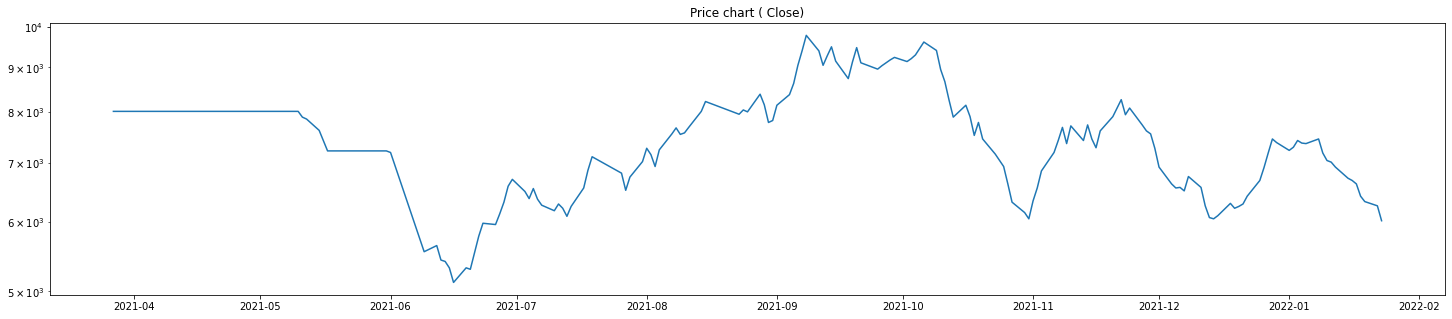

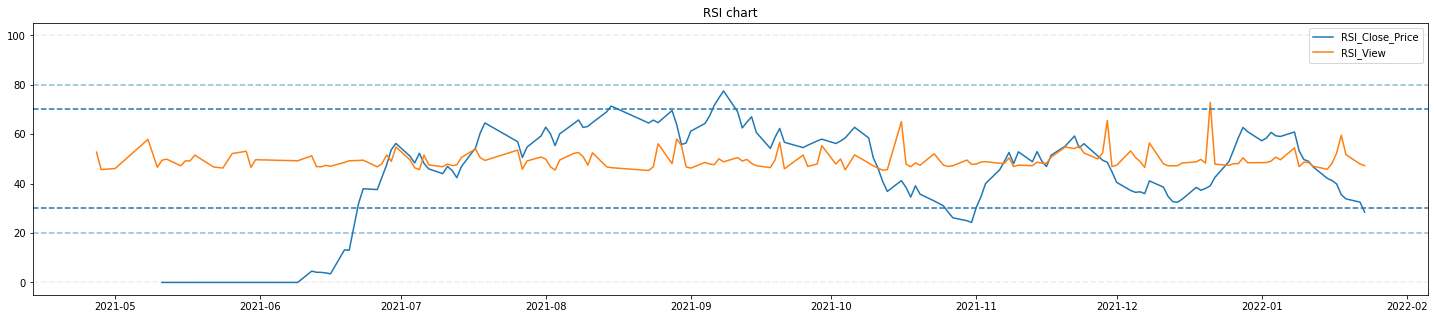

In [13]:
plt.figure(figsize=(25,5))
khosaz_df['date'] = pd.to_datetime(khosaz_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khosaz_df['date'], khosaz_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khosaz_df['date'], khosaz_df['RSI'],label='RSI_Close_Price')
plt.plot(khosaz_df['date'], khosaz_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
# Force lowercase (optional)
khosaz_df.columns = [x.lower() for x in khosaz_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khosaz_df['gregorian_date'],
        y=(khosaz_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khosaz_df['gregorian_date'],
        y=khosaz_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khosaz_df['gregorian_date'],
        y=khosaz_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khosaz_df.columns = [x.lower() for x in khosaz_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khosaz_df['gregorian_date'],
        y=(khosaz_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khosaz_df['gregorian_date'],
        y=khosaz_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khosaz_df['gregorian_date'],
        y=khosaz_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khosaz_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,7860.0,7860.0,7860.0,8020.0,1400-1-7,خوساز,155715,2021-03-27,NaN,8020.000000,NaN,2140.100000,NaN,2140.100000,NaN,2021-03-27
1,7860.0,7860.0,7860.0,8020.0,1400-1-8,خوساز,69139,2021-03-28,NaN,8020.000000,NaN,2363.416667,NaN,2274.090000,NaN,2021-03-28
2,7860.0,7860.0,7860.0,8020.0,1400-1-10,خوساز,23873,2021-03-30,NaN,8020.000000,NaN,2198.000000,NaN,2238.047368,NaN,2021-03-30
3,7860.0,7860.0,7860.0,8020.0,1400-1-11,خوساز,21119,2021-03-31,NaN,8020.000000,NaN,2788.681818,NaN,2466.772448,NaN,2021-03-31
4,7860.0,7860.0,7860.0,8020.0,1400-1-14,خوساز,8307,2021-04-03,8020.0,8020.000000,NaN,2050.538462,2308.147389,2306.985941,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6500.0,6460.0,6800.0,6630.0,1400-10-27,خوساز,1261794,2022-01-17,6800.0,6792.001934,39.901686,896.000000,377.300000,499.877039,52.294967,2022-01-17
176,6400.0,6300.0,6420.0,6420.0,1400-10-28,خوساز,1425299,2022-01-18,6680.0,6668.001289,35.530028,2095.857143,707.571429,1031.870407,59.601029,2022-01-18
177,6180.0,6110.0,6490.0,6330.0,1400-10-29,خوساز,888450,2022-01-19,6560.0,6555.334193,33.819875,987.866667,863.944762,1017.202494,51.723371,2022-01-19
178,6110.0,6030.0,6450.0,6260.0,1400-11-2,خوساز,714510,2022-01-22,6466.0,6456.889462,32.509227,374.500000,934.944762,802.968329,47.945396,2022-01-22


In [ ]:
khosaz_df['sma5']=khosaz_df['sma5'].fillna(value=khosaz_df['sma5'].mean())
khosaz_df['rsi']=khosaz_df['rsi'].fillna(value=khosaz_df['rsi'].mean())
khosaz_df['sma5_view']=khosaz_df['sma5_view'].fillna(value=khosaz_df['sma5_view'].mean())
khosaz_df['rsi_view']=khosaz_df['rsi_view'].fillna(value=khosaz_df['rsi_view'].mean())

In [ ]:
khosaz_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,7860.0,7860.0,7860.0,8020.0,1400-1-7,خوساز,155715,2021-03-27,7387.568182,8020.000000,44.096739,2140.100000,1155.408298,2140.100000,49.538012,2021-03-27
1,7860.0,7860.0,7860.0,8020.0,1400-1-8,خوساز,69139,2021-03-28,7387.568182,8020.000000,44.096739,2363.416667,1155.408298,2274.090000,49.538012,2021-03-28
2,7860.0,7860.0,7860.0,8020.0,1400-1-10,خوساز,23873,2021-03-30,7387.568182,8020.000000,44.096739,2198.000000,1155.408298,2238.047368,49.538012,2021-03-30
3,7860.0,7860.0,7860.0,8020.0,1400-1-11,خوساز,21119,2021-03-31,7387.568182,8020.000000,44.096739,2788.681818,1155.408298,2466.772448,49.538012,2021-03-31
4,7860.0,7860.0,7860.0,8020.0,1400-1-14,خوساز,8307,2021-04-03,8020.000000,8020.000000,44.096739,2050.538462,2308.147389,2306.985941,49.538012,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6500.0,6460.0,6800.0,6630.0,1400-10-27,خوساز,1261794,2022-01-17,6800.000000,6792.001934,39.901686,896.000000,377.300000,499.877039,52.294967,2022-01-17
176,6400.0,6300.0,6420.0,6420.0,1400-10-28,خوساز,1425299,2022-01-18,6680.000000,6668.001289,35.530028,2095.857143,707.571429,1031.870407,59.601029,2022-01-18
177,6180.0,6110.0,6490.0,6330.0,1400-10-29,خوساز,888450,2022-01-19,6560.000000,6555.334193,33.819875,987.866667,863.944762,1017.202494,51.723371,2022-01-19
178,6110.0,6030.0,6450.0,6260.0,1400-11-2,خوساز,714510,2022-01-22,6466.000000,6456.889462,32.509227,374.500000,934.944762,802.968329,47.945396,2022-01-22


In [ ]:
khosaz_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price with close indicator(RSI)

In [ ]:
#khosaz_new = khosaz_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
#khosaz_new = khosaz_df[['gregorian_date','close']]
khosaz_new = khosaz_df[['gregorian_date','rsi']]

print("Shape of dataframe:", khosaz_new.shape)

Shape of dataframe: (180, 2)


In [ ]:
del khosaz_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khosaz_new=scaler.fit_transform(np.array(khosaz_new).reshape(-1,1))


In [ ]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

# convert an array of values into a dataset matrix
def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khosaz_new, train_size=0.79)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (142, 1)
test_data:  (38, 1)
X_train:  (126, 15)
y_train:  (126,)
X_test:  (22, 15)
y_test (22,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
4/4 [==============================] - 9s 522ms/step - loss: 0.2498 - val_loss: 0.1349
Epoch 2/50
4/4 [==============================] - 0s 33ms/step - loss: 0.0876 - val_loss: 0.0355
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0821 - val_loss: 0.0515
Epoch 4/50
4/4 [==============================] - 0s 34ms/step - loss: 0.0557 - val_loss: 0.0294
Epoch 5/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0490 - val_loss: 0.0477
Epoch 6/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0573 - val_loss: 0.0419
Epoch 7/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0482 - val_loss: 0.0275
Epoch 8/50
4/4 [==============================] - 0s 33ms/step - loss: 0.0435 - val_loss: 0.0272
Epoch 9/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0462 - val_loss: 0.0270
Epoch 10/50
4/4 [==============================] - 0s 33ms/step - loss: 0.0429 - val_loss: 0.0267
Epoch 11/50
4/4 [===========

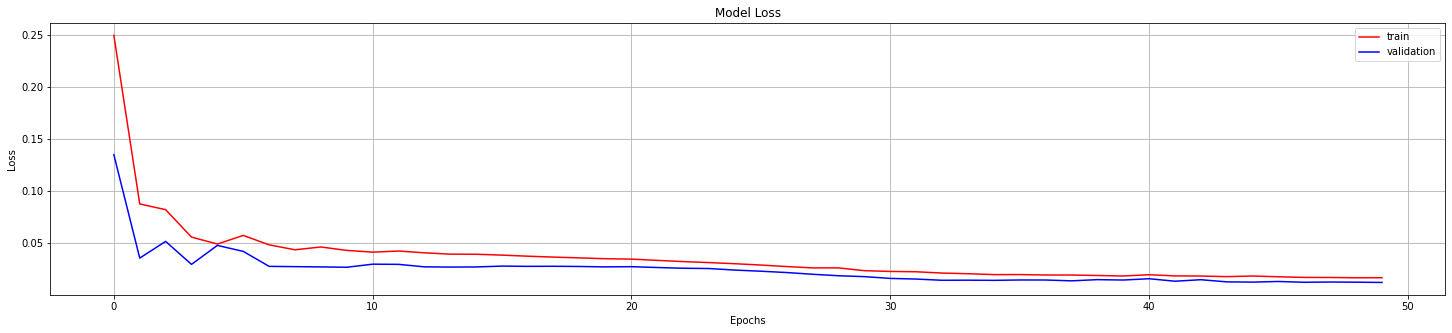

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:

predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.20148381438682184


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[0.3526857793331146], [0.3265703022480011], [0.3036145567893982], [0.28467729687690735], [0.2711339294910431]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khosaz_new[len(khosaz_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price ','Predicted next 5 days with indicator of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khosaz stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =6020 , 4 bahmn = 5980   (decrease  <-0.5 we assaign -1 (based on pdf))
##### Real close_price with RSI --> 3 bahman (timestamp=15) in our data =28.43 ,  our model prediction for 4 bahmn(timestamp=16) = 27.33 (decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

In [ ]:
khosaz_new = khosaz_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


print("Shape of dataframe:", khosaz_new.shape)

Shape of dataframe: (180, 5)


In [ ]:
del khosaz_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khosaz_new=scaler.fit_transform(np.array(khosaz_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khosaz_new, train_size=0.78)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (561, 1)
test_data:  (159, 1)
X_train:  (545, 15)
y_train:  (545,)
X_test:  (143, 15)
y_test (143,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
18/18 [==============================] - 11s 153ms/step - loss: 0.1265 - val_loss: 0.0942
Epoch 2/50
18/18 [==============================] - 1s 28ms/step - loss: 0.1210 - val_loss: 0.0946
Epoch 3/50
18/18 [==============================] - 0s 27ms/step - loss: 0.1148 - val_loss: 0.0938
Epoch 4/50
18/18 [==============================] - 0s 28ms/step - loss: 0.1173 - val_loss: 0.0932
Epoch 5/50
18/18 [==============================] - 0s 27ms/step - loss: 0.1151 - val_loss: 0.0934
Epoch 6/50
18/18 [==============================] - 0s 27ms/step - loss: 0.1154 - val_loss: 0.0917
Epoch 7/50
18/18 [==============================] - 1s 30ms/step - loss: 0.1164 - val_loss: 0.0930
Epoch 8/50
18/18 [==============================] - 0s 27ms/step - loss: 0.1150 - val_loss: 0.0912
Epoch 9/50
18/18 [==============================] - 1s 28ms/step - loss: 0.1136 - val_loss: 0.0930
Epoch 10/50
18/18 [==============================] - 1s 28ms/step - loss: 0.1119 - val_loss: 0.0852
Epoch 1

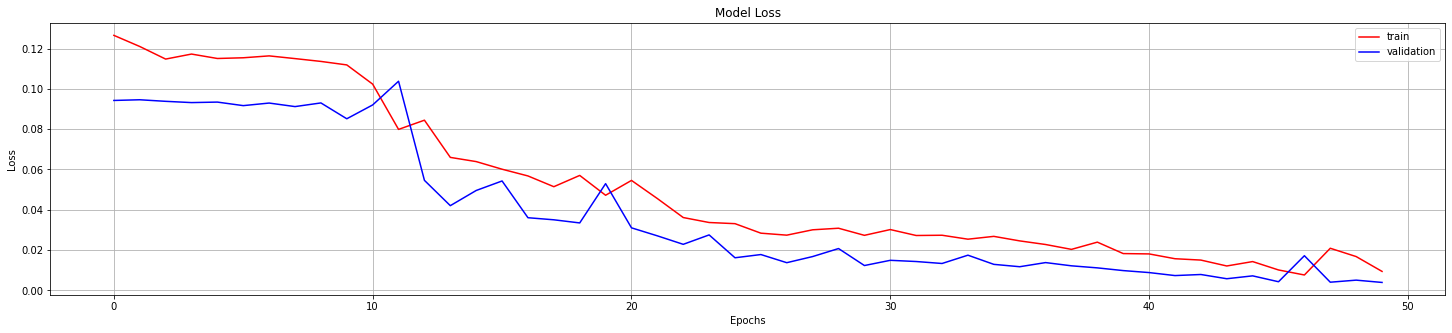

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
### Lets Do the prediction and check performance metrics
#train_predict=model.predict(X_train)
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
#print("Test data MSE: ", mean_squared_error(ytest,predictt))
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.9568661565348645


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        #print("{} day input {}".format(i,x_input))
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        #print(temp_input)
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.009498406201601028], [-0.01710980013012886], [0.7032002806663513], [0.17544147372245789], [-0.00945344753563404]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khosaz_new[len(khosaz_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khosaz stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

nozol

##### Real close_price--> 3 bahman in tsetmc site =6020 , 4 bahmn = 5980   (decrease  <-0.5 we assaign -1 (based on pdf))
##### Real close_price with social indicators --> 3 bahman (timestamp=15) in our data =924 ,  our model prediction for 4 bahmn(timestamp=16) = 89.32(decrease < -0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%